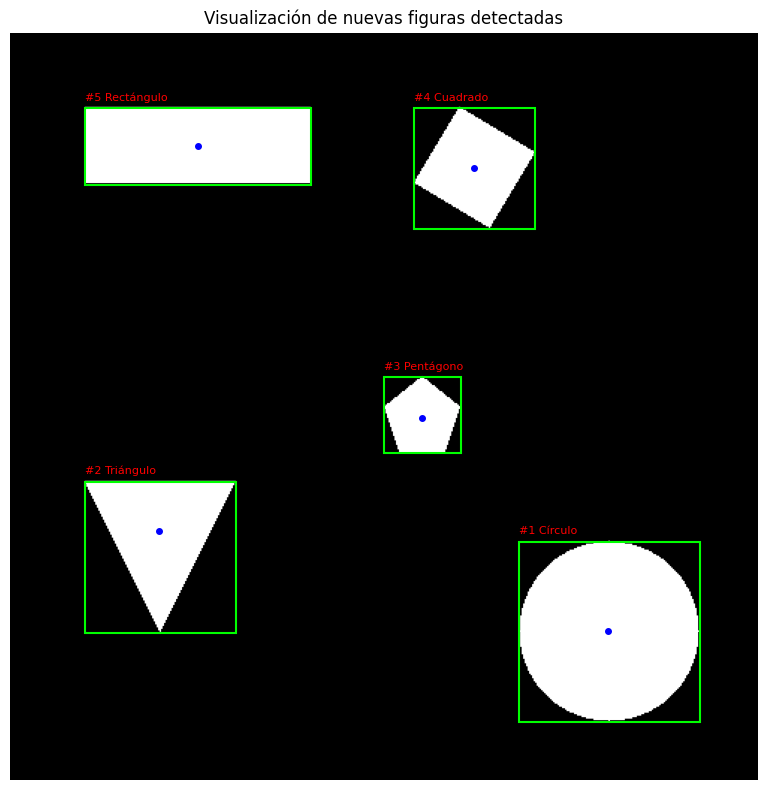

Resumen de formas encontradas:
#1: Área=11120.0, Perímetro=395.6, Centro=(400, 400), Forma=Círculo
#2: Área=5000.0, Perímetro=341.4, Centro=(99, 333), Forma=Triángulo
#3: Área=1700.0, Perímetro=164.9, Centro=(275, 257), Forma=Pentágono
#4: Área=3400.0, Perímetro=249.7, Centro=(310, 90), Forma=Cuadrado
#5: Área=7500.0, Perímetro=400.0, Centro=(125, 75), Forma=Rectángulo


In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def generar_imagen_ejemplo():
    img = np.zeros((500, 500), dtype=np.uint8)

    # Círculo grande
    cv2.circle(img, (400, 400), 60, 255, -1)

    # Rectángulo horizontal
    cv2.rectangle(img, (50, 50), (200, 100), 255, -1)

    # Triángulo invertido
    triangle = np.array([[100, 400], [150, 300], [50, 300]], np.int32)
    cv2.fillPoly(img, [triangle], 255)

    # Cuadrado inclinado (aparentemente) usando coordenadas poligonales
    square = np.array([[300, 50], [350, 80], [320, 130], [270, 100]], np.int32)
    cv2.fillPoly(img, [square], 255)

    # Pentágono irregular
    pentagon = np.array([[250, 250], [275, 230], [300, 250], [290, 280], [260, 280]], np.int32)
    cv2.fillPoly(img, [pentagon], 255)

    return img

def clasificar_forma(approx, bounding_box):
    if len(approx) == 3:
        return "Triángulo"
    elif len(approx) == 4:
        w, h = bounding_box[2], bounding_box[3]
        return "Cuadrado" if abs(w - h) < 10 else "Rectángulo"
    elif len(approx) == 5:
        return "Pentágono"
    else:
        return "Círculo"

def analizar_contornos(imagen_binaria):
    contornos, _ = cv2.findContours(imagen_binaria, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    objetos = []

    for i, contorno in enumerate(contornos):
        area = cv2.contourArea(contorno)
        perimetro = cv2.arcLength(contorno, True)
        approx = cv2.approxPolyDP(contorno, 0.04 * perimetro, True)
        M = cv2.moments(contorno)
        cx, cy = (int(M["m10"] / M["m00"]), int(M["m01"] / M["m00"])) if M["m00"] else (0, 0)
        bbox = cv2.boundingRect(contorno)
        forma = clasificar_forma(approx, bbox)

        objetos.append({
            "contorno": contorno,
            "centro": (cx, cy),
            "area": area,
            "perimetro": perimetro,
            "forma": forma,
            "bbox": bbox
        })

    return objetos

def visualizar_resultado(objetos, imagen_base):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(imagen_base, cmap='gray')
    ax.set_title("Visualización de nuevas figuras detectadas")
    ax.axis('off')

    for i, obj in enumerate(objetos):
        x, y, w, h = obj["bbox"]
        ax.add_patch(Rectangle((x, y), w, h, linewidth=1.5, edgecolor='lime', facecolor='none'))
        ax.text(x, y - 5, f"#{i+1} {obj['forma']}", color='red', fontsize=8)
        ax.plot(obj["centro"][0], obj["centro"][1], 'bo', markersize=4)

    plt.tight_layout()
    plt.show()

    print("Resumen de formas encontradas:")
    for i, obj in enumerate(objetos):
        print(f"#{i+1}: Área={obj['area']:.1f}, Perímetro={obj['perimetro']:.1f}, "
              f"Centro={obj['centro']}, Forma={obj['forma']}")

def ejecutar_analisis(imagen_path=None):
    if imagen_path:
        imagen = cv2.imread(imagen_path, cv2.IMREAD_GRAYSCALE)
        if imagen is None:
            raise ValueError(f"No se pudo cargar la imagen: {imagen_path}")
        _, binarizada = cv2.threshold(imagen, 127, 255, cv2.THRESH_BINARY)
    else:
        binarizada = generar_imagen_ejemplo()

    objetos = analizar_contornos(binarizada)
    visualizar_resultado(objetos, binarizada)

# Llamada principal
ejecutar_analisis()
